In [2]:
# Behavioral Finance

# Consider a Barberis, Huang and Santos (2001) economy with the following parameter choices 
# for the investor's utility function:
# delta = 0.99, gamma = 1, lambda = 2

# Consumption growth has a lognormal distribution:
# ln(g) = 0.02 +0.02*epsilon
# where epsilon is a standard normal random variable. 

# With these parameter choices, the risk-free rate is constant at 1.0303 per year. 
# Simulate the distribution for consumption growth with at least 10,000 random draws for epsilon. 

# Define x as one plus the dividend-price ratio for the market portfolio:
# x = (1+P/D)*(D/P) = 1+D/P

# and define the error term:
# e(x) = 0.99 * b0 * E[nvhat(x*g)] + 0.99*x - 1
# where utility from financial gain or loss is given by:
# nvhat(R) = R - 1.0303 for R>=1.0303
# nvhat(R) = 2 * (R - 1.0303) for R <1.0303

# Calculate the equilibrium values of x for b0 in the range [0, 10], using an iterative procedure known as bisection search:
# Step1:
#     Set x– = 1 and x+ = 1.1. Use the simulated distribution of consumption growth to confirm that e(x–) < 0 and e(x+) > 0. 
#     Hence solution for x must lie between x– and x+.
# Step2: 
#     Set x = 0.5*(x– + x+), and use the simulated distribution of consumption growth to calculate e(x).
# Step3: 
#     If |e(x)| < 10–4, then x is (close enough to) the solution.
# Step4:
#     Otherwise, if e(x) < 0, then the solution lies between x and x+, so repeat the procedure from step 2 with x– = x.
# Step5:
#     Otherwise, if e(x) > 0, then the solution lies between x– and x, so repeat the procedure from step 2 with x+ = x.

# Use x to calculate the price-dividend ratio for the market portfolio:
# P/D = 1/(x-1)
# Plot the price-dividend ratio (on the vertical axis) vs b0 (on the horizontal axis). 

# Also, calculate the expected market return:
# E[R(m)] = E[x*g]
# Plot the equity premium (on the vertical axis) vs b0 (on the horizontal axis). 

# Briefly explain the economic significance of the investor's utility function for financial gain or loss [i.e., nuhat(R)], 
# as well as the economic significance of the parameters b0 and lambda.
# """

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
Delta, Gamma, Lambda = 0.99, 1, 2
rf = 1.0303
num_1 = 10000
epsilon = np.random.standard_normal(num_1)
consumption_growth = np.exp(0.02 + 0.02 * epsilon)
num_2 = 201
b0 = np.linspace(0, 10, num_2)

# Initialize arrays for results
x_solution = np.zeros(num_2)

# Pre-compute some values outside the loop
mean_consumption_growth = np.mean(consumption_growth)

In [8]:
# Optimization of the Bisection Method Loop
for n in range(num_2):
    x_bi = {"x-": 1, "x+": 1.1}
    ex = {"x-": np.nan, "x+": np.nan, "x": 1}
    
    while abs(ex["x"]) >= 1e-4:
        x = (x_bi["x-"] + x_bi["x+"]) / 2
        x_bi["x"] = x
        
        for i, j in x_bi.items():
            # Compute nvhat vectorized for each x_bi value
            nvhat = np.where(j * consumption_growth >= rf, j * consumption_growth - rf, 2 * (j * consumption_growth - rf))
            ex[i] = Delta * b0[n] * np.mean(nvhat) + Delta * j - 1
        
        # Update bisection bounds
        if ex["x"] < 0:
            x_bi["x-"] = x_bi["x"]
        else:
            x_bi["x+"] = x_bi["x"]
    
    # Store the solution for this b0
    x_solution[n] = x_bi["x"]


In [24]:
# Calculate the Price-Dividend Ratio and Equity Premium
PD_ratio = 1 / (x_solution - 1)
Mkt_rt = x_solution * mean_consumption_growth
Equity_premium = Mkt_rt - rf



In [28]:
Mkt_rt

array([1.0306841 , 1.03108266, 1.03128194, 1.03158086, 1.03187978,
       1.03207907, 1.03227835, 1.03247763, 1.03257727, 1.03267691,
       1.03287619, 1.03297583, 1.03307547, 1.03317511, 1.03327476,
       1.0333744 , 1.03347404, 1.03357368, 1.03367332, 1.03367332,
       1.03377296, 1.0338726 , 1.0338726 , 1.03397224, 1.03402206,
       1.03407188, 1.0341217 , 1.03417152, 1.03417152, 1.03422134,
       1.03427116, 1.03432098, 1.0343708 , 1.0343708 , 1.03442062,
       1.03447044, 1.03447044, 1.03452026, 1.03452026, 1.03457009,
       1.03457009, 1.03461991, 1.03461991, 1.03466973, 1.03466973,
       1.03471955, 1.03471955, 1.03476937, 1.03476937, 1.03476937,
       1.03481919, 1.03481919, 1.03481919, 1.03486901, 1.03486901,
       1.03486901, 1.03491883, 1.03491883, 1.03491883, 1.03494374,
       1.03496865, 1.03496865, 1.03499356, 1.03501847, 1.03501847,
       1.03501847, 1.03504338, 1.03504338, 1.03506829, 1.03506829,
       1.03506829, 1.0350932 , 1.03511811, 1.03511811, 1.03511

In [26]:
# Calculate the simulated market returns based on x_solution and mean consumption growth
mean_consumption_growth = np.mean(consumption_growth)
market_returns = x_solution * mean_consumption_growth

# Calculate the expected market return as the mean of these market returns
expected_market_return = np.mean(market_returns)

print("Expected Market Return:", expected_market_return)


Expected Market Return: 1.0349453491540788


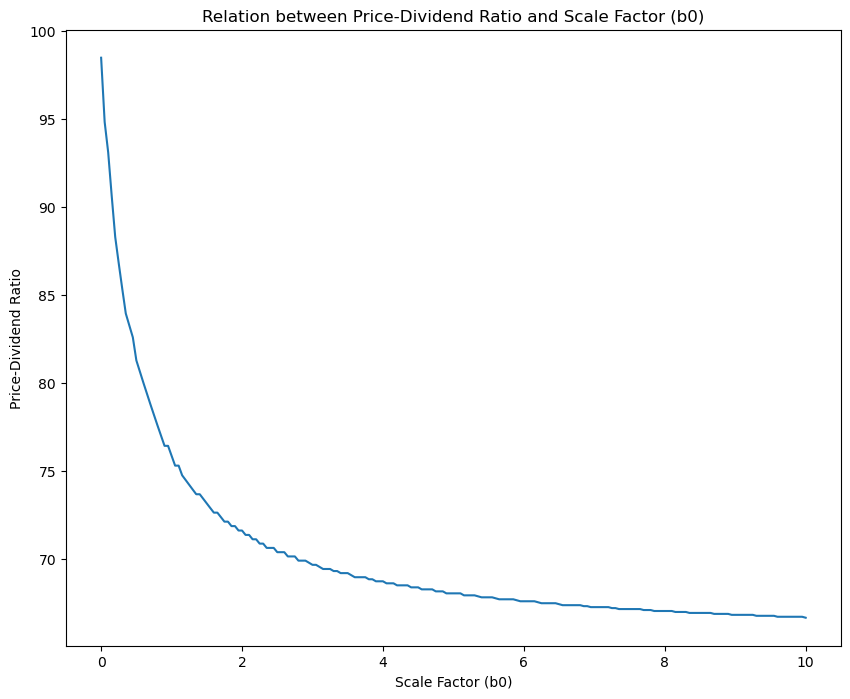

In [12]:
# Plot the Price-Dividend Ratio vs b0
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(b0, PD_ratio)
plt.xlabel('Scale Factor (b0)')
plt.ylabel('Price-Dividend Ratio')
plt.title('Relation between Price-Dividend Ratio and Scale Factor (b0)')
plt.show()

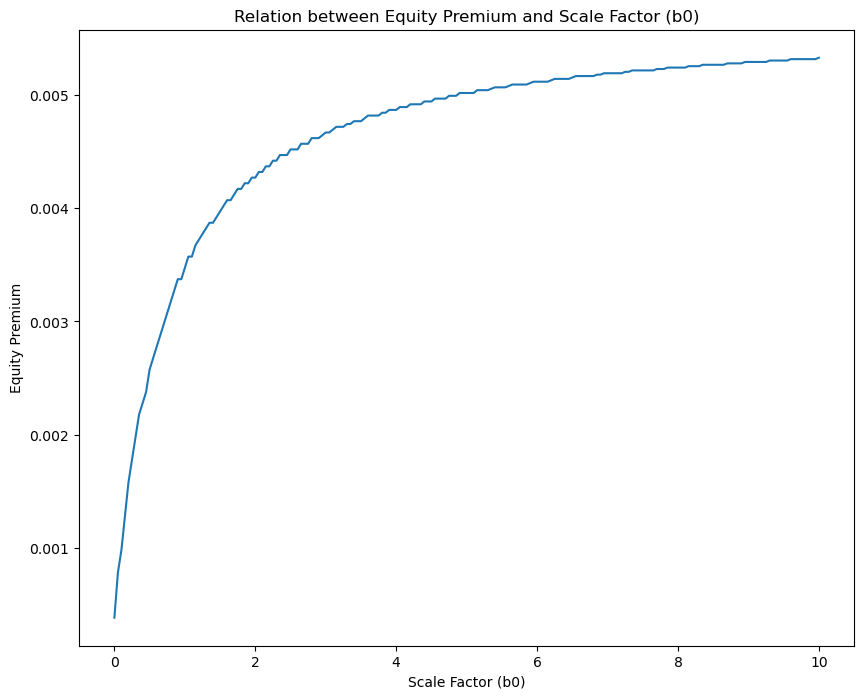

In [14]:
# Plot the Equity Premium vs b0
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(b0, Equity_premium)
plt.xlabel('Scale Factor (b0)')
plt.ylabel('Equity Premium')
plt.title('Relation between Equity Premium and Scale Factor (b0)')
plt.show()


In [18]:
# Create a results table
results_table = pd.DataFrame({
    'b0 (Scale Factor)': b0,
    'Price-Dividend Ratio': PD_ratio,
    'Equity Premium': Equity_premium
})

In [20]:
# Display the first few rows of the table
print("Results Table:")
print(results_table.head(10))  # Display the first 10 rows as a sample

Results Table:
   b0 (Scale Factor)  Price-Dividend Ratio  Equity Premium
0               0.00             98.461538        0.000384
1               0.05             94.814815        0.000783
2               0.10             93.090909        0.000982
3               0.15             90.619469        0.001281
4               0.20             88.275862        0.001580
5               0.25             86.779661        0.001779
6               0.30             85.333333        0.001978
7               0.35             83.934426        0.002178
8               0.40             83.252033        0.002277
9               0.45             82.580645        0.002377
